In [3]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import numpy as np
from itertools import product, combinations, permutations
from mpl_toolkits.mplot3d.art3d import Poly3DCollection
from ECA_plotting import *

%run ECA_plotting.py


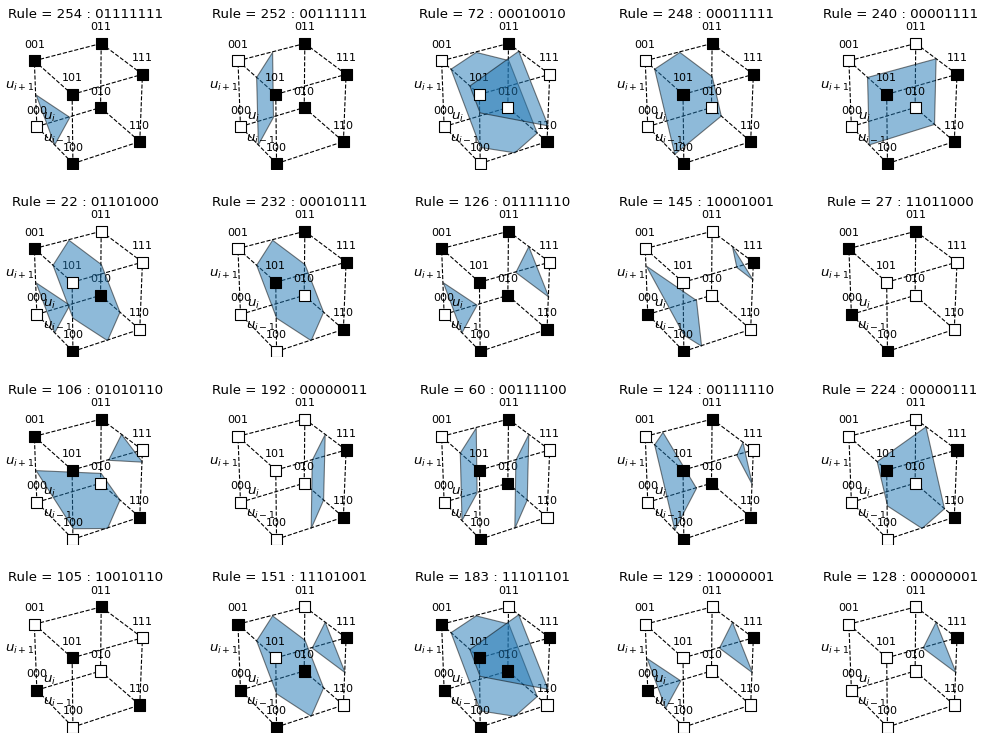

In [4]:
ec =   [254, 252, 72, 248, 240,
        22, 232, 126, 145, 27,
        106, 192, 60, 124, 224, 
        105, 151, 183, 129, 128]
pls=   [[1,1,1],[1,1,0],[2,1,2],[2,1,1],[1,0,0],
        [1,1,1],[1,1,1],[1,1,1],[1,2,2],[0,0,0],
        [1,1,3],[1,1,0],[1,1,0],[2,2,1],[2,1,1],
        [0,0,0],[1,1,1],[2,1,2],[1,1,1],[1,1,1]]



Ts = [(0.5,),(0.5,),(2.5,3.5),(1.5,),(0.5,),
    (0.5,1.5),(1.5,),(0.5,2.5),(1.5,4.5),(0,),
    (1.5,4.5),(1.5,),(0.5,1.5),(1.5,4.5),(2.5,),
    (0,),(1.5,2.5),(2.5,3.5),(0.5,2.5),(2.5,)]

rules = {rule: (pl,T) for rule,pl,T in zip(ec,pls,Ts)}

f =  plt.figure(figsize=(15, 10), dpi=80)
plt.subplots_adjust(left=0.1,
                    bottom=0.1,
                    right=0.9,
                    top=1,
                    wspace=0.4,
                    hspace=0.2)


# sorted(list(rules.keys()))
i=0
for rule in rules.keys():
    
    i+=1
    fig,ax = plotSetup(fig = f,spdim=[4,5],i = i)
    drawCube(ax)
    # draw corner points
    drawRule(ax,rule)
    for T in rules[rule][1]:
        drawPlaneInCube(ax,rules[rule][0],T)
        
plt.show()

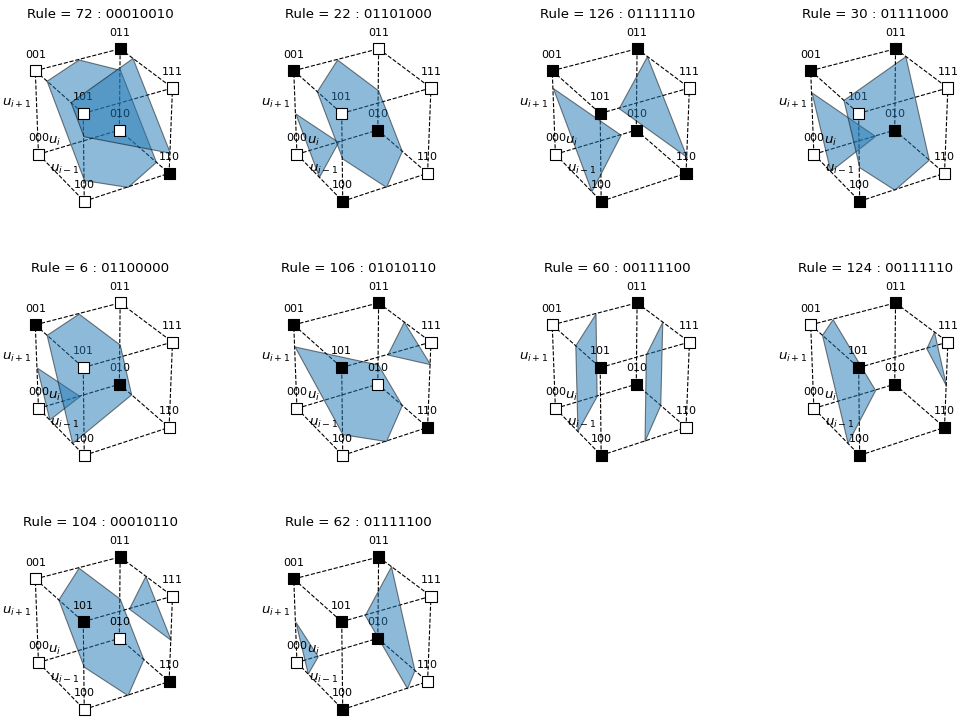

In [5]:
ec =   [254, 252, 72, 248, 240,
        22, 232, 126, 30, 6,
        106, 192, 60, 124, 224, 
        104, 62, 183, 129, 128]

pls=   [[1,1,1],[1,1,0],[2,1,2],[2,1,1],[1,0,0],
        [1,1,1],[1,1,1],[1,1,1],[2,1,1],[2,1,1],
        [1,1,2],[1,1,0],[1,1,0],[2,2,1],[2,1,1],
        [1,1,1],[2,2,1],[2,1,2],[1,1,1],[1,1,1]]

Ts = [(0.8,3.2),(0.5,2.5),(2.5,3.5),(1.5,4.5),(0.5,1.5),
    (0.5,1.5),(1.5,3.5),(0.8,2.2),(0.75,2.4),(0.5,1.5),
    (1.5,3.5),(1.5,2.5),(0.5,1.5),(1.5,4.5),(2.5,4.5),
    (1.5,2.5),(0.5,3.5),(2.5,3.5),(0.5,2.5),(2.5,3.5)]


rule_subset = [72,22, 126, 30, 6,
        106,60, 124, 
        104, 62]
# rule_subset= [rule for rule in ec if rule not in [183,129]]
rules = {rule: (pl,T) for rule,pl,T in zip(ec,pls,Ts) if rule in rule_subset}
# rules = {rule: (pl,T) for rule,pl,T in zip(ec,pls,Ts)}

f =  plt.figure(figsize=(15, 10), dpi=80)
plt.subplots_adjust(left=0.1,
                    bottom=0.1,
                    right=0.9,
                    top=1,
                    wspace=0.4,
                    hspace=0.2)


# sorted(list(rules.keys()))
i=0
for rule in rules.keys():
    
    i+=1
    fig,ax = plotSetup(fig = f,spdim=[3,4],i = i)
    drawCube(ax)
    # draw corner points
    drawRule(ax,rule)
    for T in rules[rule][1]:
        drawPlaneInCube(ax,rules[rule][0],T)
        
plt.show()

In [6]:
from ElementaryCA import *
newRules = {}
ruleSets = []

shift_left = lambda lst, spaces: lst[spaces % len(lst):] + lst[:spaces % len(lst)]
shift_right = lambda lst, spaces: lst[-spaces % len(lst):] + lst[:-spaces % len(lst)]


for i,rule in enumerate(rules.keys()):
    ruleSets.append(set())  # change from dictionary to set
    for j  in range(3):
        perml = shift_left([0,1,2],j)
        permr = shift_right([0,1,2],j)
        newpl = [rules[rule][0][i] for i in permr]
        
        newRule = permuteRule(rule,perml)
        newRules[newRule] = (newpl,rules[rule][1])
        ruleSets[i].add(newRule)  # update to use add method on set
        


In [7]:


id = 13
n = len(ruleSets[id])
f= plt.figure(figsize=(5*n, 8), dpi=80)
plt.subplots_adjust(left=0.1,
                    bottom=0.1,
                    right=0.9,
                    top=1,
                    wspace=0.4,
                    hspace=0.2)
for i,rule in enumerate(ruleSets[id]):
    fig,ax = plotSetup(fig = f,spdim=[1,len(ruleSets[id])],i = i+1)
    drawCube(ax)
    # draw corner points
    drawRule(ax,rule)
    for T in newRules[rule][1]:
        drawPlaneInCube(ax,newRules[rule][0],T)
    
plt.show()



IndexError: list index out of range

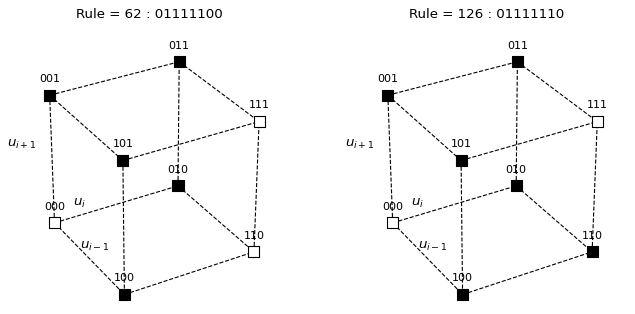

In [8]:
fig = plt.figure(figsize=(10, 5), dpi=80)
fig,ax = plotSetup(fig = fig,spdim=[1,2],i = 1)
drawCube(ax)
    # draw corner points
drawRule(ax,62)

fig,ax = plotSetup(fig = fig,spdim=[1,2],i = 2)
drawCube(ax)
    # draw corner points
drawRule(ax,126)


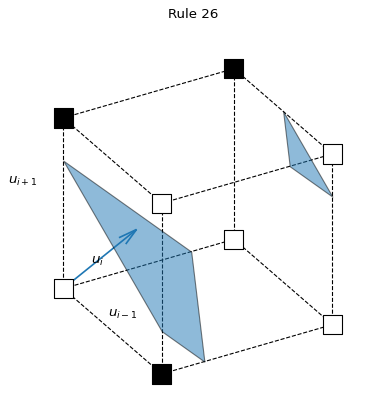

In [9]:
# difficult thresholds: 27,105 are impossible with k=2 threshold
rule = 26
rulebinary = [int(x) for x in f'{rule:#010b}'[-1:1:-1]]
fig,ax = plotSetup(proj = 'ortho')
drawCube(ax)
a = drawRule(ax,rule,labelCorners=False)
pl = [1,2,2]
T = 1.5
a.set_sizes([300])
drawPlaneInCube(ax,pl,T)
drawPlaneInCube(ax,pl,T+3)
ax.title.set_text(f"Rule {rule}")
# a.set_sizes(150)
ax.quiver(0,0,0, *pl,normalize=True,length=0.5,arrow_length_ratio=0.2)
#add pl text to the plot at tip of arrow
# ax.text(*pl, f'({pl[0]},{pl[1]},{pl[2]})', size=15, zorder=1, color='k')

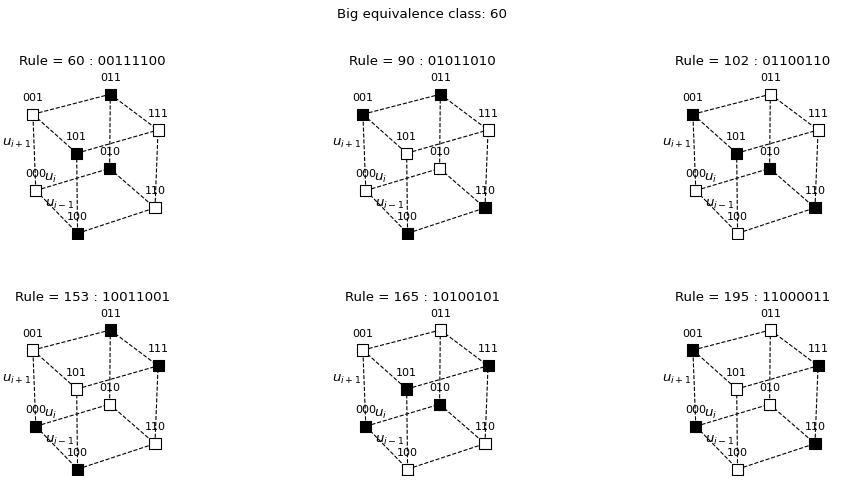

In [10]:
from ElementaryCA import getGEC, rulebin


f =  plt.figure(figsize=(15, 10), dpi=80)
plt.subplots_adjust(left=0.1,
                    bottom=0.1,
                    right=0.9,
                    top=0.9,
                    wspace=0.1,
                    hspace=0.4)


rules = getGEC(90)
n = int(np.ceil(np.sqrt(len(rules)))) #make the subplot grid size flexible

for i,rule in enumerate(rules):
    
    fig,ax = plotSetup(fig = f,spdim=[n,n],i = i+1)
    drawCube(ax)
    # draw corner points
    drawRule(ax,rule)
fig.suptitle(f"Big equivalence class: {rules[0]}")
plt.show()

In [ ]:
%run ECA_plotting.py

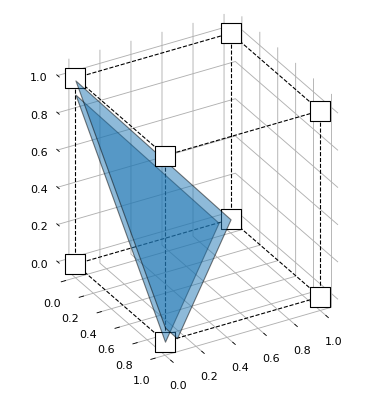

In [ ]:
from matplotlib.animation import FuncAnimation
fig,ax = plotSetup(proj = 'ortho')
drawCube(ax)

normals = [[np.sin(x)*5+60,np.cos(x)*5+60,np.sin(x+np.pi*0.2)*10+60] for x in np.linspace(0,2*np.pi,100)]

def update(i):
    ax.cla()
    drawCube(ax)

    plot_cube_with_planes(ax,normals[i],60,65)
    return ax
plot_cube_with_planes(ax,[60,60,60],50,80)

ani = FuncAnimation(fig, update, frames=np.arange(0, 100), interval=100)

In [ ]:
ani.save('cube.mp4',writer='ffmpeg',fps=30)

In [ ]:
allrules = set()

for i in range(256):
    allrules.add(getGEC(i))
    
allrules = sorted(allrules)

for i in allrules:
    print(i)

(0,)
(1, 2, 4, 8, 16, 32, 64, 128)
(3, 5, 10, 12, 17, 34, 48, 68, 80, 136, 160, 192)
(6, 9, 18, 20, 33, 40, 65, 72, 96, 130, 132, 144)
(7, 11, 13, 14, 19, 21, 35, 42, 49, 50, 69, 76, 81, 84, 112, 138, 140, 162, 168, 176, 196, 200, 208, 224)
(15, 51, 85, 170, 204, 240)
(22, 41, 73, 97, 104, 134, 146, 148)
(23, 43, 77, 113, 142, 178, 212, 232)
(24, 36, 66, 129)
(25, 26, 28, 37, 38, 44, 52, 56, 67, 70, 74, 82, 88, 98, 100, 131, 133, 137, 145, 152, 161, 164, 193, 194)
(27, 29, 39, 46, 53, 58, 71, 78, 83, 92, 114, 116, 139, 141, 163, 172, 177, 184, 197, 202, 209, 216, 226, 228)
(30, 45, 54, 57, 75, 86, 89, 99, 101, 106, 108, 120, 135, 147, 149, 154, 156, 166, 169, 180, 198, 201, 210, 225)
(31, 47, 55, 59, 79, 87, 93, 115, 117, 143, 171, 174, 179, 186, 205, 206, 213, 220, 234, 236, 241, 242, 244, 248)
(60, 90, 102, 153, 165, 195)
(61, 62, 91, 94, 103, 110, 118, 122, 124, 155, 157, 167, 173, 181, 185, 188, 199, 203, 211, 217, 218, 227, 229, 230)
(63, 95, 119, 175, 187, 207, 221, 238, 243, 245

In [ ]:
len(allrules)

22

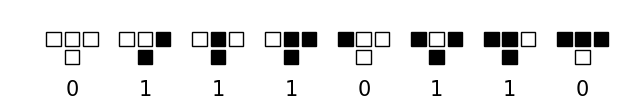

In [15]:

import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle

def plot_lookup_table(rule):
    fig= plt.figure(figsize=(8, 2))
    ax = fig.add_subplot(111)
    plt.xlim((-10,160))
    plt.ylim((-10,10))
    ax.set_aspect('equal')
    colors = ['white','black']

    d = 4
    spacing = 1
    configspacing = 20

    rulebinary = rulebin(rule)

    for config in range(8):
        ibin = [int(x) for x in f'{config:#05b}'[2:]]
        ax.add_patch(Rectangle([config*configspacing, 0],d,d,edgecolor= 'black', facecolor = colors[ibin[0]]))
        ax.add_patch(Rectangle([config*configspacing+d+spacing, 0],d,d,edgecolor= 'black',facecolor = colors[ibin[1]]))
        ax.add_patch(Rectangle([config*configspacing+2*d+2*spacing, 0],d,d,edgecolor= 'black',facecolor = colors[ibin[2]]))

        ax.add_patch(Rectangle([config*configspacing+d+spacing, -d-spacing],d,d,edgecolor= 'black', facecolor = colors[rulebinary[config]]))
        ax.text(config*configspacing+d+spacing+d/2, -d-spacing*8, rulebinary[config], size=15, zorder=1, color='k',ha="center", va="center")

    ax.axis('off')
    plt.show()
    
plot_lookup_table(110)


In [ ]:
# #find out which sets in allrules do not contain any of the ec
# for i in allrules:
#     if len(set(i).intersection(set(ec))) == 0:
#         print(i)

underrepresented = []
overrepresented = []
#find is there are any duplicate sets from which each ec is represented
for i in allrules:
    if len(set(i).intersection(set(ec))) == 0:
        underrepresented.append(i)
        
    if len(set(i).intersection(set(ec))) > 1:
        overrepresented.append(i)
        print(set(i).intersection(set(ec)))
print(underrepresented)
print(overrepresented)


{72, 6}
{104, 22}
{106, 30}
{124, 62}
[(0,), (25, 26, 28, 37, 38, 44, 52, 56, 67, 70, 74, 82, 88, 98, 100, 131, 133, 137, 145, 152, 161, 164, 193, 194), (27, 29, 39, 46, 53, 58, 71, 78, 83, 92, 114, 116, 139, 141, 163, 172, 177, 184, 197, 202, 209, 216, 226, 228), (105, 150), (107, 109, 121, 151, 158, 182, 214, 233), (255,)]
[(6, 9, 18, 20, 33, 40, 65, 72, 96, 130, 132, 144), (22, 41, 73, 97, 104, 134, 146, 148), (30, 45, 54, 57, 75, 86, 89, 99, 101, 106, 108, 120, 135, 147, 149, 154, 156, 166, 169, 180, 198, 201, 210, 225), (61, 62, 91, 94, 103, 110, 118, 122, 124, 155, 157, 167, 173, 181, 185, 188, 199, 203, 211, 217, 218, 227, 229, 230)]
